In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
dataframe = pd.read_csv('./PAMAP2_Extracted_300_25.csv')

X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [3]:
def RandomForrestClassification(X, y, depth):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.20)

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    clf = RandomForestClassifier(max_depth = depth, random_state=123)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    p = precision_score(y_test, y_pred,average=None).mean()
    r = recall_score(y_test, y_pred, average=None).mean()

    print("Accuracy: %.3f \nPrecision: %.3f \nRecall: %.3f" % (acc, p, r) )

    cm = confusion_matrix(y_test, y_pred, normalize = 'true')

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, 
        display_labels=['Other', 'Sitting', 'Standing', 'Running', 'Rope jumping']
    )

    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax)
    
    return acc, p, r

### Entire data

#### Checking different max depths for Random Forest - [10, 25, 50, 100]

50 and 100 achieved the best results (exactly the same), so max_depth = 50 will be used since now

- - - - - - - - - - - - -
DEPTH: 10
Accuracy: 0.906 
Precision: 0.959 
Recall: 0.798
- - - - - - - - - - - - -
DEPTH: 25
Accuracy: 0.934 
Precision: 0.975 
Recall: 0.865
- - - - - - - - - - - - -
DEPTH: 50
Accuracy: 0.935 
Precision: 0.976 
Recall: 0.867
- - - - - - - - - - - - -
DEPTH: 100
Accuracy: 0.935 
Precision: 0.976 
Recall: 0.867


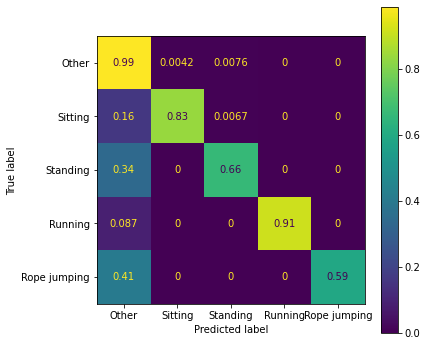

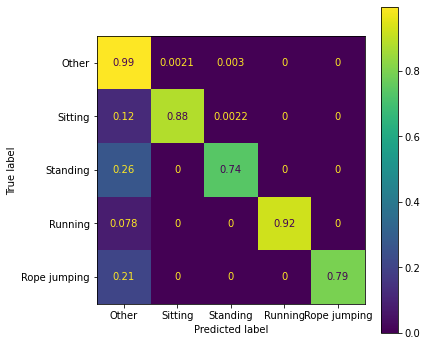

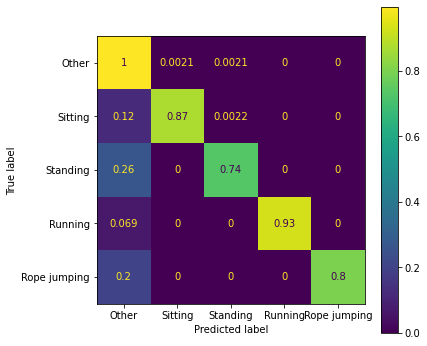

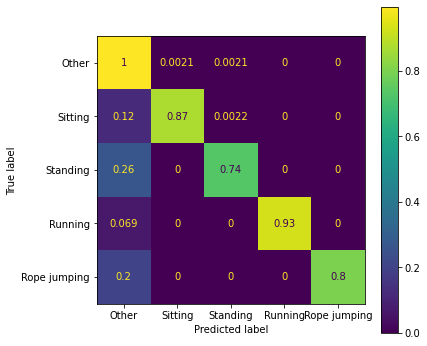

In [4]:
depths = [10, 25, 50, 100]

accs = []
pres = []
recs = []

for depth in depths:
    print("- - - - - - - - - - - - -")
    print("DEPTH:", depth)
    
    acc, p, r = RandomForrestClassification(X, y, depth)
    
    accs.append(acc)
    pres.append(p)
    recs.append(r)

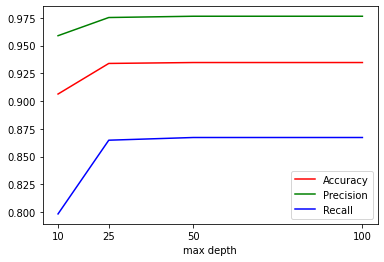

In [5]:
plt.figure()
plt.plot(depths, accs, 'r', label='Accuracy')
plt.plot(depths, pres, 'g', label='Precision')
plt.plot(depths, recs, 'b', label='Recall')
plt.xticks([10, 25, 50, 100])
plt.xlabel('max depth')
plt.legend()
plt.show()

In [6]:
acc_1_3_cols = []
acc_4_6_cols = []
gyroscope_cols = []
magnetometer_cols = []

for i in range(1, X.shape[1], 12):
    acc_1_3_cols.append(str(i))
    acc_1_3_cols.append(str(i+1))
    acc_1_3_cols.append(str(i+2))

for i in range(4, X.shape[1], 12):
    acc_4_6_cols.append(str(i))
    acc_4_6_cols.append(str(i+1))
    acc_4_6_cols.append(str(i+2))
    
for i in range(7, X.shape[1], 12):
    gyroscope_cols.append(str(i))
    gyroscope_cols.append(str(i+1))
    gyroscope_cols.append(str(i+2))
    
for i in range(10, X.shape[1], 12):
    magnetometer_cols.append(str(i))
    magnetometer_cols.append(str(i+1))
    magnetometer_cols.append(str(i+2))

### Acceleromter +16g only

Accuracy: 0.879 
Precision: 0.926 
Recall: 0.787


(0.8793668122270742, 0.9262162897998014, 0.787015867148568)

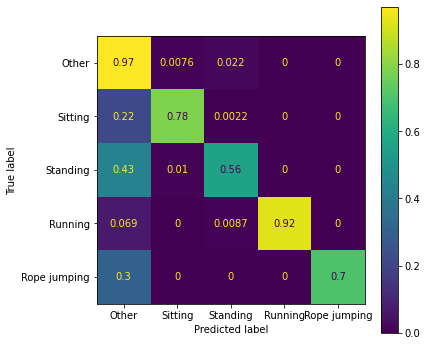

In [7]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

RandomForrestClassification(X, y, depth = 50)

### Acceleromter +6g only

Slightly better than +16g, so I will use that one in next comparisions

Accuracy: 0.880 
Precision: 0.929 
Recall: 0.787


(0.8799126637554585, 0.928731290389827, 0.7870549706783867)

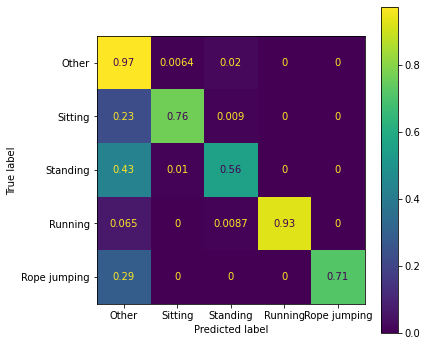

In [8]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

RandomForrestClassification(X, y, depth = 50)

### Gryoscope only

Worst one

Accuracy: 0.749 
Precision: 0.761 
Recall: 0.577


(0.7489082969432315, 0.7610566082146826, 0.5767422354118374)

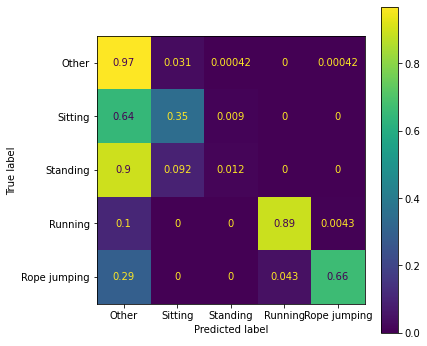

In [9]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

RandomForrestClassification(X, y, depth = 50)

### Magnetometer only

Best single one

Accuracy: 0.916 
Precision: 0.964 
Recall: 0.797


(0.9164847161572053, 0.9641382880263656, 0.7968825355361726)

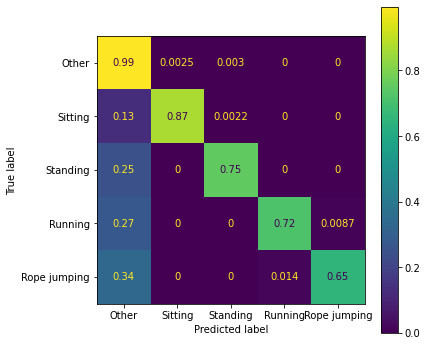

In [10]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)

RandomForrestClassification(X, y, depth = 50)

### Acceleromter (+6g) + Magnetometr

Best combination, even better than entire data

Accuracy: 0.937 
Precision: 0.976 
Recall: 0.867


(0.9369541484716157, 0.9762226813482805, 0.8667582184345569)

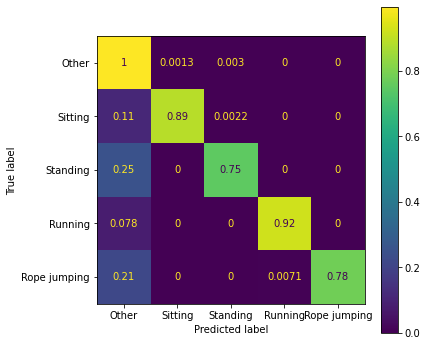

In [11]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)

RandomForrestClassification(X, y, depth = 50)

### Acceleromter (+6g) + Gyroscope

Worst combination

Accuracy: 0.875 
Precision: 0.917 
Recall: 0.792


(0.8752729257641921, 0.9166516494568955, 0.7924434137258464)

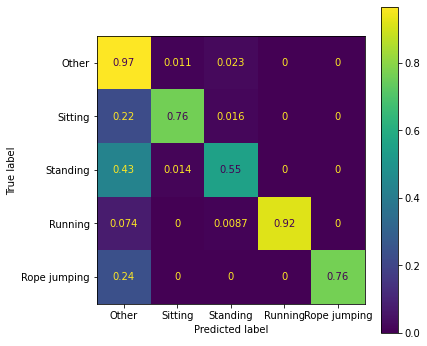

In [12]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

RandomForrestClassification(X, y, depth = 50)

### Gyroscope + Magnetometr

Accuracy: 0.921 
Precision: 0.963 
Recall: 0.835


(0.9208515283842795, 0.9631228590944712, 0.8347432007187559)

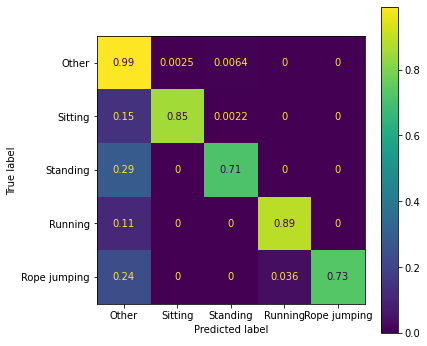

In [13]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)

RandomForrestClassification(X, y, depth = 50)